# Lab 03, Feb 4 2020.
### Due Feb 11, 2020, before lab.
### COMPAS Risk Score Analysis - Part II

In this lab, you will continue auditing the the COMPAS Risk Algorithm for notions of fairness. 

Refer to the [Problem Set: Criminal justice case study](https://fairmlbook.org/classification.html#problem-set-criminal-justice-case-study) in the "Fairness in ML" book. 
Also, feel free to consult the [notebook on the Adult Data Set](https://fairmlbook.org/code/adult.html) referred to in the text.

### Getting Started
To get started, like last time create a `lab03` folder in your local repo alongwith a `data` folder. In the data folder, place the data file we will be using, which was obtained by ProPublica as a result of a public records request from Broward County, Florida. The csv file can be downloaded from [here](https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv). Place it in your `data` folder for `lab03`. 



In [3]:
%matplotlib inline

import pandas as pd
import pylab
import numpy as np
import seaborn as sns

import pylab
import numpy as np
import matplotlib.pyplot as plt

Loading the data

In [4]:

data = pd.read_csv('data/compas-scores-two-years.csv', index_col=0)

Now we will filter out rows where **days_b_screening_arrest** is over 30 or under -30, leaving us with 6,172 rows. 

In [5]:
#Filtering out data
filterData = data[(data['days_b_screening_arrest'] <= 30) & (data['days_b_screening_arrest'] >= -30)]

In [6]:
#checking if the data is the correct size
filterData.shape

(6172, 52)

### Task 1 
First, we'll answer this parf of the [text's case study on the Propublica data](https://fairmlbook.org/classification.html#problem-set-criminal-justice-case-study), that is: 
> Plot the fraction of defendants recidivating within two years `two_year_recid == 1`) as a function of risk score (`decile_score`), for black defendants (`race == "African-American"`) and white defendants (`race == "Caucasian"`).

To achieve this, first construct a data frame that contains only these three features, that is, **two_year_recid**, **decile_score**, and **race**. Make it a habit to inspect the head or tail of this data frame.

In [7]:

chosen_cols = ['two_year_recid', 'decile_score', 'race']
df = filterData[chosen_cols]
df.shape
df.head()


,two_year_recid,decile_score,race
id,,,
1,0,1,Other
3,1,3,African-American
4,1,4,African-American
7,0,1,Other
8,1,6,Caucasian


Notice that each row falls in a **decile_score** bucket between 1 and 10. Now write the body of a function that given a dataframe, returns two lists (each of length 10). Each element of the first list corresponds to the number of people in the dataframe who have a specific decile score and for whom **two_year_recid == 1**. The corresponding element of the second list counts the total number of people with that decile score. Use your function from Lab 2 here.

In [8]:
### My answer
def get_frequencies(df, num_buckets=10, count_criterion = 'two_year_recid'):
    """Returns list of lists. The first list is successes 
    for all buckets, the second one is total counts."""
    
    frequencies = [[],[]]
  
    for i in range(num_buckets):
        a = df[df['decile_score'] == i+1]
        current_recid = a[count_criterion]
        total = len(current_recid)
        success = len(a[a[count_criterion] == 1])
        frequencies[0].append(success)
        frequencies[1].append(total)
        
    return frequencies

**Q1** To make sure, we understand what's happening here. Which variable is `Y`, the target variable? What is $\hat{Y}$?

Now, we'll set up things to plot.

In [9]:
# Setting up things to plot

races = ['African-American', 'Caucasian']
styles = ['-', '--']
colors = ['g', 'b']
deciles = range(1, 10+1)
pylab.rc('font',  size='17')
pylab.rc('axes', labelsize='large')
pylab.rc('lines', linewidth=3)

Now, use the `pylab.plot` to plot the decile scores along the x-axis and the proportion of successes along the y-axis, for both races. Use the output of the `get_frequencies` function to do this. I have provided the entire machinery for the plotting for you. All you need to do is to use the `pylab.plot` function to achieve this. Fill in the details below. Compare to my plot.

Text(0.5, 0, 'Score decile')

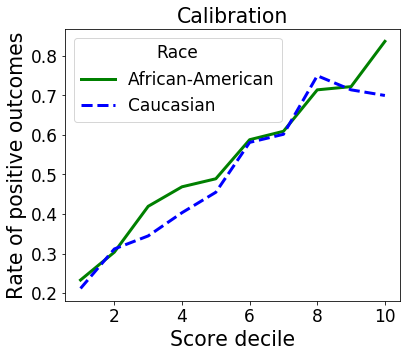

In [10]:


#Setting up the figure, size and title.
pylab.figure(1, figsize=(6, 5))
pylab.title('Calibration')

#For both races, plot the proportion 
# of successes versus the deciles


for i in range(2):
    race = races[i]
    
    ## fill in the details below
    pylab.plot(what goes here?, what goes here?,  label=race, linestyle = styles[i], color = colors[i])

#Setting up the legend, and other labels.

pylab.legend(title="Race")
pylab.ylabel('Rate of positive outcomes')
pylab.xlabel('Score decile')


**Q2** What does this plot indicate? Try to express these plots in terms of probabilities. 

### Task 2 Now, we go on to the next part, which is examining the Separation criterion.

> Plot the distribution of scores received by the positive class (recidivists) and the distribution of scores received by the negative class (non-recidivists) for black defendants and for white defendants.



In [12]:
# new dataframe of black defendants only
black = df[df['race']=='African-American']

#new dataframe of white defendants only
white = df[df['race']=='Caucasian']

# get the frequency of black defendants who did recidivate by score 
# my function, replace with yours
freq_black = get_frequencies(black, num_buckets=10, count_criterion = 'two_year_recid')

# get the frequency  white defendants who did recidivate by score 
# my function call, replace with yours
freq_white = get_frequencies(white, num_buckets=10, count_criterion = 'two_year_recid')



Now use `pylab.plot` to plot the decile scores along the x-axis and the probability of receiving a score among recidivating and non-recidivating  defendants of each race on the y-axis. 

In [ ]:
# 
pylab.figure(3, figsize=(6, 5))
pylab.title('Separation')

# my answer
pylab.plot(fill in details here, fill in details here, '.-', label="Black, Recidivated", linestyle = '--', color = "red")
pylab.plot(fill in details, fill in details, '.-', label="Black, Non-recidivated", linestyle = '--', color = "blue")
pylab.plot(fill in details, fill in details,  label="White, Recidivated", linestyle = ':', color = "green")
pylab.plot(fill in details, fill in details, label="White, Non-recidivated", linestyle = ':', color = "black")

pylab.legend()

pylab.ylabel('Probability of Scores')
pylab.xlabel('Score decile')

**Q3** Describe the separation criterion in your own words between the two groups we are considering. Does this plot indicate separation? Why or why not?

### Part 3
First, report the recidivism rate of defendants aged 25 or lower, and defendants aged 50 or higher. Note the stark difference between the two: younger defendants are far more likely to recidivate.


In [14]:
df_25_under = filterData[filterData['age']<=25]
df_50_over =  filterData[filterData['age']>=50]

df_25_under_recid = filterData[(filterData['age']<=25) & (filterData['two_year_recid'] == 1)]
df_50_over_recid = filterData[(filterData['age']>=50) & (filterData['two_year_recid'] == 1)]


print("Recidivism rate for 25 and under:", len(df_25_under_recid)/len(df_25_under))
print("Recidivism rate for 50 and over:", len(df_50_over_recid)/len(df_50_over))


Recidivism rate for 25 and under: 0.5514705882352942
Recidivism rate for 50 and over: 0.30469644902634596


**Q4:** Now, answer the following questions to the best of your ability. These questions don't have a single correct answer - we will use your responses as an input to a class discussion on the relationship between auditing a scoring process for fairness and the underlying societal contexts in which they are used.

> Suppose we are interested in taking a data-driven approach to changing the criminal justice system. Under a theory of incarceration as incapacitation (prevention of future crimes by removal of individuals from society), how might we act on the finding that younger defendants are more likely to reoffend?


> How might we act on this finding under a rehabilitative approach to justice, in which we seek to find interventions that minimize a defendant’s risk of recidivism?

> Under a retributive theory of justice, punishment is based in part on culpability, or blameworthiness; this in turn depends on how much control the defendant had over their actions. Under such a theory, how might we act on the finding that younger defendants are more likely to reoffend (and, more generally, commit offenses at all)?

### Part 4
Work on this part after you have read the section on [Calibration and Sufficiency from the textbook](https://fairmlbook.org/classification.html#calibration-and-sufficiency). Refer to the plots you generated in Task 1 of this lab. Based on these plots, does the risk score satisfy sufficiency across racial groups in this dataset? This is somewhat subjective, since we want to allow for approximate equality between groups; justify your answer.

### Part 5
Refer to your lab 2 for this section. The plot generated in Task 3c of lab 2 is essentially an ROC plot. Explain why?